In [5]:
from data_preprocessing import *
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [6]:
# define linear model
lin_model = SGDRegressor(penalty="elasticnet", tol=10, random_state=42)

# define random forest model
rf_model = RandomForestRegressor(
    n_estimators=100, criterion='mse', min_samples_leaf=0.001, random_state=42
)

In [7]:
def compute_learning_curves(model, X_train,X_val, y, y_val, curve_step, verbose=False):
    
    # n_train_obs is number of rows
    n_train_obs = X_train.shape[0]
    
    # n_iter is number of iterations     
    n_iter = math.ceil(n_train_obs / curve_step)
    
    # define lists that contains erroes and steps numbers    
    train_errors, val_errors, steps = [], [], []
    
    # loop for train and predict model in number of iterations    
    for i in range(n_iter):
        
        # amounts data points         
        n_obs = (i+1) * curve_step
        n_obs = min(n_obs, n_train_obs)
        
        # training sample        
        model.fit(X_train[:n_obs], y_train[:n_obs])
        
        # predicting training_sample
        y_train_predict = model.predict(X_train[:n_obs])
        
        # predicting testing_sample
        y_val_predict = model.predict(X_val)
        
        # calculating errors        
        train_mse = mean_squared_error(y_train[:n_obs], y_train_predict)
        val_mse = mean_squared_error(y_val, y_val_predict)
        val_mse=val_mse  
        train_mse=train_mse
        
        # appending train_mse, val_mse, n_obs on their lists
        train_errors.append(train_mse)
        val_errors.append(val_mse)
        steps.append(n_obs)
        
        # if you like show results during training
        if verbose:
            msg = "Iteration {0}/{1}: train_rmse={2:.2f}, val_rmse={3:.2f}".format(
                i+1, n_iter, np.sqrt(train_mse), np.sqrt(val_mse)
            )
            print(msg)
    return steps, train_errors, val_errors

# drawing the differnce between train_rmse and val_rmse
def plot_learning_curves(steps, train_errors, val_errors, ax=None, title=""):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(6, 4))
    train_rmse = np.sqrt(train_errors)
    val_rmse = np.sqrt(val_errors)
    ax.plot(steps, train_rmse, color="tab:blue",
            marker=".", label="training")
    ax.plot(steps, val_rmse, color="tab:orange",
            marker=".", label="validation")
    ylim = (0.8*np.median(train_rmse),
            1.5*np.median(val_rmse))
    ax.set_ylim(ylim)
    ax.set_xlabel("Number of observations")
    ax.set_ylabel("RMSE (MW)")
    ax.set_title(title)
    ax.legend()
    ax.grid()

In [8]:
# linear model training
steps, train_mse, val_mse = compute_learning_curves(lin_model, X_train_prep, X_test_prep, y_train, y_test,  500, verbose=True)

Iteration 1/72: train_rmse=3191.89, val_rmse=23972.90
Iteration 2/72: train_rmse=3083.56, val_rmse=14630.90
Iteration 3/72: train_rmse=2970.62, val_rmse=10085.97
Iteration 4/72: train_rmse=2851.61, val_rmse=10322.55
Iteration 5/72: train_rmse=2853.35, val_rmse=7989.88
Iteration 6/72: train_rmse=2821.44, val_rmse=6485.93
Iteration 7/72: train_rmse=2902.15, val_rmse=6558.68
Iteration 8/72: train_rmse=2941.16, val_rmse=5775.11
Iteration 9/72: train_rmse=2868.31, val_rmse=5015.92
Iteration 10/72: train_rmse=2830.65, val_rmse=5036.55
Iteration 11/72: train_rmse=2840.32, val_rmse=4706.30
Iteration 12/72: train_rmse=2778.87, val_rmse=4315.11
Iteration 13/72: train_rmse=2800.34, val_rmse=3999.23
Iteration 14/72: train_rmse=2833.61, val_rmse=3961.71
Iteration 15/72: train_rmse=2781.67, val_rmse=3391.02
Iteration 16/72: train_rmse=2803.83, val_rmse=3067.02
Iteration 17/72: train_rmse=2833.88, val_rmse=3038.22
Iteration 18/72: train_rmse=3061.18, val_rmse=3066.88
Iteration 19/72: train_rmse=3057.

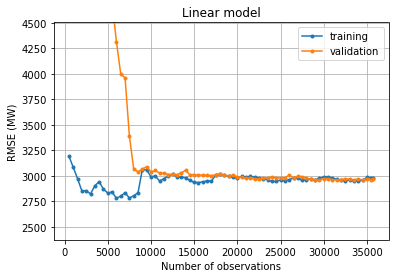

In [9]:
# result of lin_model
plot_learning_curves(steps, train_mse, val_mse, title="Linear model")

In [10]:
# random forest model training
steps1, train_mse1, val_mse1 = compute_learning_curves(rf_model, X_train_prep, X_test_prep, y_train, y_test,  500, verbose=True)

Iteration 1/72: train_rmse=584.31, val_rmse=3642.63
Iteration 2/72: train_rmse=492.38, val_rmse=3531.92
Iteration 3/72: train_rmse=555.51, val_rmse=3423.59
Iteration 4/72: train_rmse=533.04, val_rmse=3162.02
Iteration 5/72: train_rmse=772.43, val_rmse=2622.90
Iteration 6/72: train_rmse=816.16, val_rmse=2521.57
Iteration 7/72: train_rmse=919.29, val_rmse=2302.82
Iteration 8/72: train_rmse=1003.88, val_rmse=2208.02
Iteration 9/72: train_rmse=1099.87, val_rmse=2210.56
Iteration 10/72: train_rmse=1055.17, val_rmse=2194.11
Iteration 11/72: train_rmse=1131.92, val_rmse=2190.51
Iteration 12/72: train_rmse=1111.03, val_rmse=2194.52
Iteration 13/72: train_rmse=1228.88, val_rmse=2221.28
Iteration 14/72: train_rmse=1228.29, val_rmse=2215.96
Iteration 15/72: train_rmse=1297.04, val_rmse=2254.32
Iteration 16/72: train_rmse=1301.86, val_rmse=2195.61
Iteration 17/72: train_rmse=1372.59, val_rmse=2235.71
Iteration 18/72: train_rmse=1466.28, val_rmse=2210.60
Iteration 19/72: train_rmse=1527.96, val_rms

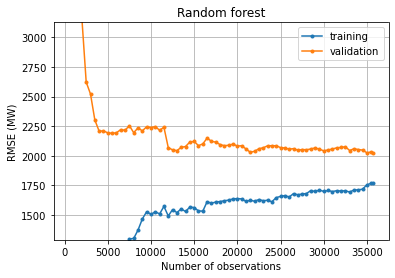

In [12]:
# result of random forest model
plot_learning_curves(steps1, train_mse1, val_mse1, title="Random forest")